# VisionHomework4

## MNIST NETWORK - Achieved 80% Accuracy

### Helper Functions

In [10]:
import copy
import numpy as np
from scipy.special import expit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def sig(x):
    return expit(x)

def deriv_sig(x):
    return sig(x)*(1-sig(x))

def gaus_ran(n, shape):
    return np.random.normal (0, 1/n**(.5), shape)

# Taken from: http://neuralnetworksanddeeplearning.com/chap1.html

In [11]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import cPickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    #f = gzip.open('../data/mnist.pkl.gz', 'rb')
    f = gzip.open('mnist.pkl.gz', 'rb')
    
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [12]:
training_data, validation_data, test_data = load_data_wrapper()

## Hyperparameters

In [13]:
# Learning Rate
alpha = 2.3
epsilon = 0.001
maximum_error_permitted = 1.1
maximum_epochs = 5000

## Input and Output

In [14]:
x_s = []
#x_s.append (X_train[0])
    
"""
x_s.append (training_data[0][0])
x_s.append (training_data[1][0])
x_s.append (training_data[2][0])
"""

y_s=[]
"""
y_s.append (training_data[0][1])
y_s.append (training_data[1][1])
y_s.append (training_data[2][1])
"""
for i in range (6000):
    x_s.append (training_data[i][0])
    y_s.append (training_data[i][1])
    
no_of_x_s = len(x_s[0])
no_of_samples = len(x_s)
assert len(x_s) == len(y_s)

## Number of Layers and Neurons & Initialization

In [15]:
no_of_neurons_each_layer = [10,10,10]
no_of_layers = len (no_of_neurons_each_layer)

# Initialize the weights neuron and for each layer
W_s=[]
W_s.append (gaus_ran(no_of_samples, (no_of_neurons_each_layer[0],no_of_x_s)))
for i in range(1,len(no_of_neurons_each_layer)):
    W_s.append (gaus_ran(no_of_samples, (no_of_neurons_each_layer[i],no_of_neurons_each_layer[i-1])))

b_s=[]
for l in no_of_neurons_each_layer:
    b_s.append (gaus_ran(no_of_samples, (l,1)))

## Learn and Running the Network

In [16]:
def learn (in_W_s, in_b_s):
    z_s=[]
    a_s=[]

    # FEEDFORWARD

    ## FIRST LAYER WITH X'S
    z=[]
    a=[]
    for x in x_s:
        z.append (np.dot(in_W_s[0],x) + in_b_s[0])
        a.append (sig(z[-1]))
    z_s.append (z)
    a_s.append (a)

    ## EVERY SUBSEQUENT LAYER WITH PREVIOUS OUTPUT
    for i in range (1, no_of_layers):
        z=[]
        a=[]
        for j in range (no_of_samples):
            z.append (np.dot(in_W_s[i],a_s[-1][j]) + in_b_s[i])
            a.append (sig(z[-1]))
        z_s.append (z)
        a_s.append (a)

    # BACKPROPAGATION

    ## LAST: DELTA L
    delta_s=[]

    delta=[]
    for i in range (no_of_samples):
        delta.append ((a_s[-1][i] - y_s[i]) * deriv_sig(z_s[-1][i]))
    delta_s.append (delta)

    ## EVERY LAYER FROM L-1 to 1
    for i in range(no_of_layers-2, -1, -1): ### We start at no_of_layers-2 because -1 is the final layer
        delta=[]
        for j in range (no_of_samples):
            delta.append (np.dot (np.transpose (in_W_s[i+1]), delta_s[0][j]) * deriv_sig(z_s[i][j]))
        delta_s.insert (0,delta)

    # GRADIENT DESCENT
    sum_W_s=[]
    sum_b_s=[]
    for i in range(no_of_layers):
        sum_W_s.append (np.zeros(in_W_s[i].shape))
        sum_b_s.append (np.zeros(in_b_s[i].shape))

    out_W_s=[]
    out_b_s=[]

    for j in range(no_of_samples):
        sum_W_s[0] += np.dot (delta_s[0][j], np.transpose (x_s[j]))
        sum_b_s[0] += delta_s[0][j]
    out_W_s.append (in_W_s[0] - sum_W_s[0] * alpha / no_of_samples)
    out_b_s.append (in_b_s[0] - sum_b_s[0] * alpha / no_of_samples)

    for i in range (1, no_of_layers):
        for j in range(no_of_samples):
            sum_W_s[i] += np.dot (delta_s[i][j], np.transpose (a_s[i-1][j]))
            sum_b_s[i] += delta_s[i][j]
        out_W_s.append (in_W_s[i] - sum_W_s[i] * alpha / no_of_samples)
        out_b_s.append (in_b_s[i] - sum_b_s[i] * alpha / no_of_samples)
    
    out_ans = a_s[-1]
    
    """
    for a in a_s[-1]:
        out_ans.append (a[0])
    """
    
    return out_ans, out_W_s, out_b_s
    
def run_network (in_W_s, in_b_s):
    W_s = in_W_s
    b_s = in_b_s
    
    epoch=0
    errors = []
    while (epoch < maximum_epochs):
        ans, W_s, b_s = learn (W_s, b_s)
        sum=0
        for i in range (no_of_samples):
            temp = mean_squared_error(ans[i],y_s[i])
            #print i,temp
            sum += temp
        errors.append (sum)
        if (epoch > 0):
            if errors[epoch-1] - errors[epoch] < epsilon and errors[-1] < maximum_error_permitted:
                break
        epoch+=1
    
    if (epoch == maximum_epochs):
        print "Did not reach terminating condition. Epochs:",epoch
    else:
        print "Terminated at epoch",epoch
    print "Final output:",ans
    
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()
    
    return errors,W_s,b_s

Did not reach terminating condition. Epochs: 5000
Final output: [array([[ 0.00047338],
       [ 0.00572618],
       [ 0.01127094],
       [ 0.36792152],
       [ 0.00748012],
       [ 0.19109349],
       [ 0.0239989 ],
       [ 0.02538925],
       [ 0.13218948],
       [ 0.02407834]]), array([[  8.79584709e-01],
       [  1.12402594e-04],
       [  2.62164377e-02],
       [  4.19626034e-03],
       [  2.14937867e-03],
       [  4.93254279e-02],
       [  8.07895090e-02],
       [  4.05111878e-05],
       [  3.60876912e-03],
       [  4.32046037e-04]]), array([[  1.94269323e-04],
       [  7.56680970e-03],
       [  1.01630601e-03],
       [  5.25700828e-02],
       [  1.60766840e-01],
       [  7.39575865e-02],
       [  8.78234641e-03],
       [  1.73200521e-01],
       [  6.95546810e-02],
       [  3.09503538e-01]]), array([[  3.44261361e-04],
       [  9.10352368e-01],
       [  7.59971412e-02],
       [  2.19679944e-02],
       [  1.24442156e-02],
       [  7.46564992e-03],
       

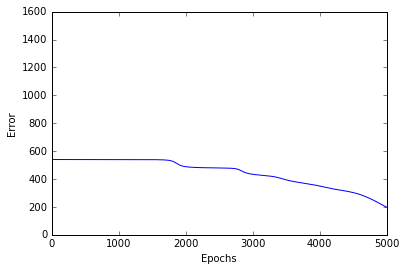

In [17]:
errors,out_W_s,out_b_s = run_network(W_s,b_s)

In [21]:
print errors[-2] - errors[-1]

0.267063555007


In [22]:
#len (test_data) # 10000
test_x_s = []
test_y_s = []
for i in range (10000):
    test_x_s.append (test_data[i][0])
    test_y_s.append (test_data[i][1])

In [23]:
def test (in_x_s, in_y_s, in_W_s, in_b_s):
    z_s=[]
    a_s=[]

    # FEEDFORWARD

    ## FIRST LAYER WITH X'S
    z=[]
    a=[]
    for x in in_x_s:
        z.append (np.dot(in_W_s[0],x) + in_b_s[0])
        a.append (sig(z[-1]))
    z_s.append (z)
    a_s.append (a)

    ## EVERY SUBSEQUENT LAYER WITH PREVIOUS OUTPUT
    for i in range (1, no_of_layers):
        z=[]
        a=[]
        for j in range (len (in_x_s)):
            z.append (np.dot(in_W_s[i],a_s[-1][j]) + in_b_s[i])
            a.append (sig(z[-1]))
        z_s.append (z)
        a_s.append (a)

    #print np.argmax (a_s[-1][0])
    #print in_y_s[0]
    
    number_of_correct_output = 0.0
    for i in range (len(in_x_s)):
        output = np.argmax (a_s[-1][i])
        #print "output",output
        correct_ans = in_y_s[i]
        #print "correct_ans",correct_ans
        if output == correct_ans:
            number_of_correct_output += 1
    print "Our accuracy is",number_of_correct_output / len(in_x_s)
    
    return a_s[-1]
    
out_ans = test (test_x_s, test_y_s, out_W_s, out_b_s)

Our accuracy is 0.8082
